<h1> Dataset Us - Accidents</h1>

<b>Description</b>

This is a countrywide car accident dataset, which covers 49 states of the United States. The accident data are collected from February 2016 to December 2019, using several data providers, including two APIs that provide streaming traffic incident data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.0 million accident records in this dataset. Check here to learn more about this dataset.
Acknowledgements


    Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

    Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

<b>Content</b>

This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to December 2019 for the Contiguous United States. Check here to learn more about this dataset.
Inspiration

US-Accidents can be used for numerous applications such as real-time car accident prediction, studying car accidents hotspot locations, casualty analysis and extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence.
Usage Policy and Legal Disclaimer

This dataset is being distributed only for Research purposes, under Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0). By clicking on download button(s) below, you are agreeing to use this data only for non-commercial, research, or academic applications. You may need to cite the above papers if you use this dataset. 
<hr>
<ol>
    <li><b>Dataset overview</b></li>
    <li><b>Import libs, import data</b></li>
    <li><b>Describe imported DataFrame</b></li>
    <li><b>CleanUp of DataSet</b></li>
    <li><b>Visualization</b></li>
    <li><b>Conclusion</b></li>
</ol>
   



<h1>Import libs, import data</h1>

In [211]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [212]:
#Change custom string, to NaN float values, while reading csv
na_vals = ['NA', 'Missing']

df = pd.read_csv('/run/media/adrian/e7e19456-4785-4c08-8f92-4d1eca201c56/DataSet/us-accidents/US_Accidents_Dec19.csv', na_values = na_vals)

# Describe DataFrame

### We will use some panda methods or attributes to get informations about DataFrame.

In [213]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [214]:
df.shape

(2974335, 49)

In [215]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.246264e+06,2.974335e+06,2.974335e+06,2.974335e+06,728071.000000,728071.000000,2.974335e+06,1.056730e+06,2.918272e+06,1.121712e+06,2.915162e+06,2.926193e+06,2.908644e+06,2.533495e+06,975977.000000
mean,2.078316e+02,2.360190e+00,3.649361e+01,-9.542625e+01,37.580871,-99.976032,2.855654e-01,5.837004e+03,6.235120e+01,5.132685e+01,6.540542e+01,2.983190e+01,9.150770e+00,8.298064e+00,0.020495
std,2.032959e+01,5.414733e-01,4.918849e+00,1.721881e+01,5.004757,18.416647,1.548392e+00,1.515928e+04,1.878855e+01,2.519127e+01,2.255676e+01,7.213808e-01,2.892114e+00,5.138546e+00,0.235770
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,24.570110,-124.497829,0.000000e+00,0.000000e+00,-7.780000e+01,-6.590000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.010000e+02,2.000000e+00,3.355040e+01,-1.172920e+02,33.957554,-118.286610,0.000000e+00,8.370000e+02,5.000000e+01,3.200000e+01,4.900000e+01,2.982000e+01,1.000000e+01,4.600000e+00,0.000000
50%,2.010000e+02,2.000000e+00,3.584969e+01,-9.025083e+01,37.903670,-96.631690,0.000000e+00,2.717000e+03,6.440000e+01,5.400000e+01,6.700000e+01,2.998000e+01,1.000000e+01,7.000000e+00,0.000000
75%,2.010000e+02,3.000000e+00,4.037026e+01,-8.091891e+01,41.372630,-82.323850,1.000000e-02,7.000000e+03,7.600000e+01,7.300000e+01,8.400000e+01,3.011000e+01,1.000000e+01,1.040000e+01,0.000000
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,25.000000


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

# CleanUp of DataSet




Find if there are any columns that can be dropped, because of many missing values, to make DataFrame more clean.
Check if there is possibility to change dtype of some columns, eg. object to float64

## Find missing values in DataSet

In [217]:
#Find NaN/Null values
df.isna().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

In [218]:
df.drop(columns=['End_Lat', 'End_Lng', 'Number', 'Precipitation(in)'], inplace=True)

## Change Data Type (dtype) of columns

In [233]:
# Change two Series from object to datetime Dtype
#

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

df['Month'] = df['Start_Time'].dt.month
df['Hour'] = df['Start_Time'].dt.hour

# Visualization 
###### We will make some graphs, to represent most useful information about dataset.

In [220]:
state_grp = df.groupby('State')


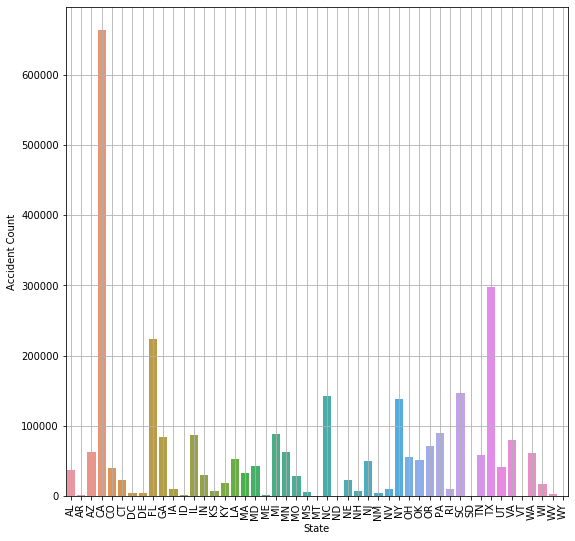

In [232]:
#list of states

state_accident_count = state_grp['State'].value_counts()

#state = state_grp.groups.keys()
state = state_accident_count.index.get_level_values(0)

#fig, ax = plt.subplots(figsize=(9,9))
plt.figure(figsize=(9,9))
ax = sns.barplot(state, state_accident_count)
ax.set(xlabel='State', ylabel='Accident Count')
plt.xticks(rotation=90)
plt.grid()

<h6>5 most States with accidents</h6>

[Text(0, 0.5, 'Accident Count'), Text(0.5, 0, 'State')]

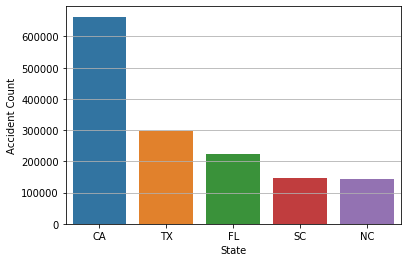

In [222]:
#5  most States with acidents

#old plot
#state_accident_count_5max.plot(kind='bar', 
#                               grid=True, 
#                               title='5 States with most accidents',
#                               )

#Get 5 largest States with accidents
state_accident_count_5max = state_grp['State'].value_counts().nlargest(5)

#Get indexes names (States) for this 5 values
state_5max = state_accident_count_5max.index.get_level_values(0)

plt.grid()
ax = sns.barplot(x=state_5max, y=state_accident_count_5max)
ax.set(xlabel='State', ylabel='Accident Count')

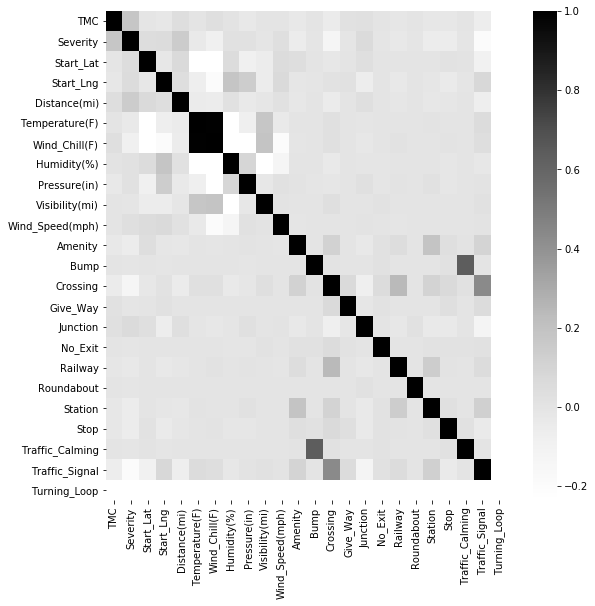

In [223]:
corr = df.corr() 

#change size of figure ax=ax
#fig, ax = plt.subplots(figsize=(9,9)) 
plt.figure(figsize=(9,9))
sns.heatmap(corr, cmap='Greys', robust=True)

<h6>Accidents by Month</h6>

[Text(0, 0.5, 'Accident Count'), Text(0.5, 0, 'Month')]

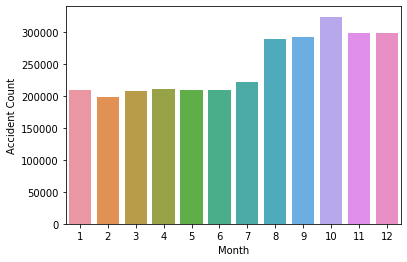

In [265]:
month_grp = df.groupby('Month')
month = month_grp['Month'].value_counts().index.get_level_values(0)
month_acc_count = month_grp['Month'].value_counts()

ax = sns.barplot(x=month, y=month_acc_count, data=df)
ax.set(xlabel='Month', ylabel='Accident Count')

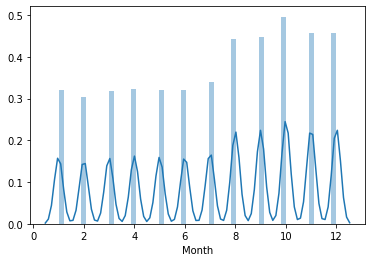

In [267]:
ax = sns.distplot(df['Month'])